## Transborder Freight Analysis Using CRISP-DM Framework


###  Importation of Packages

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Importation

In [5]:
   # This is a function that allows to unzips and read the csv files
def process_data_from_directory(base_directory, output_file1, output_file2, output_file3):
    # Lists to store DataFrames for each prefix (dot1, dot2, dot3)
    dot1_data = []
    dot2_data = []
    dot3_data = []

    # Walk through the directory to find CSV files
    for root, dirs, files in os.walk(base_directory):
        for file in files:
            if file.endswith('.csv'):  # Process only CSV files
                if 'ytd' in file.lower():  # Skip files containing 'ytd' in the filename
                    print(f"Skipping {file} as it contains 'ytd' in the filename.")
                    continue  # Skip this file

                file_path = os.path.join(root, file)
                try:
                    # Read CSV file into a DataFrame
                    df = pd.read_csv(file_path, low_memory=False)

                    # Categorize based on the prefix
                    if file.startswith('dot1'):
                        dot1_data.append(df)
                    elif file.startswith('dot2'):
                        dot2_data.append(df)
                    elif file.startswith('dot3'):
                        dot3_data.append(df)

                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    # Step 3: Concatenate the DataFrames based on the prefix
    combined_dot1 = pd.concat(dot1_data, ignore_index=True) if dot1_data else None
    combined_dot2 = pd.concat(dot2_data, ignore_index=True) if dot2_data else None
    combined_dot3 = pd.concat(dot3_data, ignore_index=True) if dot3_data else None

    # Save the combined data to output files if any data exists
    if combined_dot1 is not None:
        combined_dot1.to_csv(output_file1, index=False)
        print(f"Combined dot1 data saved to {output_file1}")

    if combined_dot2 is not None:
        combined_dot2.to_csv(output_file2, index=False)
        print(f"Combined dot2 data saved to {output_file2}")

    if combined_dot3 is not None:
        combined_dot3.to_csv(output_file3, index=False)
        print(f"Combined dot3 data saved to {output_file3}")

    return combined_dot1, combined_dot2, combined_dot3

In [6]:
# Call the function to process files and save the combined data
base_directory = "data"  # Replace with your actual directory path
output_file1 = "combined_dot1.csv"
output_file2 = "combined_dot2.csv"
output_file3 = "combined_dot3.csv"

combined_dot1, combined_dot2, combined_dot3 = process_data_from_directory(
    base_directory, output_file1, output_file2, output_file3
)

# Display the first few rows of each combined dataset
if combined_dot1 is not None:
    print("Combined dot1 DataFrame:")
    print(combined_dot1.head())

if combined_dot2 is not None:
    print("Combined dot2 DataFrame:")
    print(combined_dot2.head())

if combined_dot3 is not None:
    print("Combined dot3 DataFrame:")
    print(combined_dot3.head())

Skipping dot1_ytd_0420.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0420.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0420.csv as it contains 'ytd' in the filename.
Skipping dot1_ytd_0820.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0820.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0820.csv as it contains 'ytd' in the filename.
Skipping dot1_ytd_0220.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0220.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0220.csv as it contains 'ytd' in the filename.
Skipping dot1_ytd_0120.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0120.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0120.csv as it contains 'ytd' in the filename.
Skipping dot1_ytd_0720.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0720.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0720.csv as it contains 'ytd' in the filename.
Error reading data\2020\J

### Expoloratory Data Analysis (EDA)

#### Data Cleaning and Validation

In [9]:
combined_dot1.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4.0,2020
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4.0,2020
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4.0,2020
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4.0,2020
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4.0,2020


In [10]:
combined_dot1.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
1649156,2,WY,4101,3,NaN,XC,1220,8869,63,290,NaN,0,9.0,2024
1649157,2,WY,4101,3,NaN,XN,1220,10853,29,72,NaN,0,9.0,2024
1649158,2,WY,4101,3,NaN,XO,1220,59348,307,858,NaN,0,9.0,2024
1649159,2,WY,4101,3,NaN,XQ,1220,12689,53,382,NaN,0,9.0,2024
1649160,2,WY,41XX,3,NaN,NaN,2010,11931,38,136,NaN,0,9.0,2024


In [11]:
combined_dot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649161 entries, 0 to 1649160
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TRDTYPE          1649161 non-null  int64  
 1   USASTATE         1649161 non-null  object 
 2   DEPE             1649161 non-null  object 
 3   DISAGMOT         1649161 non-null  int64  
 4   MEXSTATE         481275 non-null   object 
 5   CANPROV          1044410 non-null  object 
 6   COUNTRY          1649161 non-null  int64  
 7   VALUE            1649161 non-null  int64  
 8   SHIPWT           1649161 non-null  int64  
 9   FREIGHT_CHARGES  1649161 non-null  int64  
 10  DF               1029645 non-null  float64
 11  CONTCODE         1649161 non-null  object 
 12  MONTH            1528035 non-null  float64
 13  YEAR             1649161 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 176.1+ MB


In [12]:
combined_dot1.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,1.649161e+06,1.649161e+06,1.649161e+06,1.649161e+06,1.649161e+06,1.649161e+06,1.029645e+06,1.528035e+06,1.649161e+06
mean,1.375655e+00,4.839831e+00,1.509695e+03,5.731768e+06,2.334948e+06,7.521747e+04,1.329927e+00,6.038520e+00,2.021991e+03
std,4.842918e-01,1.432696e+00,3.807045e+02,1.106477e+08,1.117767e+08,2.734839e+06,4.701867e-01,3.230619e+00,1.286290e+00
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03
25%,1.000000e+00,5.000000e+00,1.220000e+03,2.006500e+04,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.021000e+03
50%,1.000000e+00,5.000000e+00,1.220000e+03,1.058920e+05,3.000000e+00,3.950000e+02,1.000000e+00,6.000000e+00,2.022000e+03
75%,2.000000e+00,5.000000e+00,2.010000e+03,7.001060e+05,9.801000e+03,3.953000e+03,2.000000e+00,9.000000e+00,2.023000e+03
max,2.000000e+00,9.000000e+00,2.010000e+03,4.801019e+10,8.395042e+10,2.009334e+09,2.000000e+00,1.200000e+01,2.024000e+03


In [13]:
combined_dot1.describe(include=object)

,USASTATE,DEPE,MEXSTATE,CANPROV,CONTCODE
count,1649161,1649161,481275,1044410,1649161
unique,52,246,33,14,3
top,TX,2304,XX,XO,0
freq,97360,178430,56043,280189,895365


In [14]:
#Checking for Number of Dulpicates 

combined_dot1.duplicated().sum()

27550

In [15]:
combined_dot1.shape

(1649161, 14)

In [16]:
#Dropping Duplicates Values
combined_dot1 = combined_dot1.drop_duplicates()

In [17]:
combined_dot1.shape

(1621611, 14)

In [18]:
combined_dot1.duplicated().sum()

0

In [19]:
combined_dot1['TRDTYPE'].value_counts()

TRDTYPE
1    1012540
2     609071
Name: count, dtype: int64

In [20]:
combined_dot1.loc[:,'TRDTYPE'] = combined_dot1['TRDTYPE'].replace({1: "Export", 2: "Import"})

In [21]:
combined_dot1['TRDTYPE'].value_counts()

TRDTYPE
Export    1012540
Import     609071
Name: count, dtype: int64

In [22]:
combined_dot1['DEPE'].value_counts()

DEPE
2304    175472
3802     66016
20XX     65096
0901     57043
3401     54745
         ...  
2481         9
3881         5
0182         3
0152         2
3385         1
Name: count, Length: 246, dtype: int64

In [23]:
combined_dot1['DISAGMOT'].value_counts()

DISAGMOT
5    897579
3    317681
6    238576
8    104187
1     51474
7      6413
9      4669
4      1032
Name: count, dtype: int64

In [24]:
combined_dot1.loc[:, 'DISAGMOT'] = combined_dot1['DISAGMOT'].replace({
    1: "Vessel",
    3: "Air",
    4: "Mail",
    5: "Truck",
    6: "Rail",
    7: "Pipeline",
    8: "Other",
    9: "Foreign Trade Zones"
})

In [25]:
combined_dot1['DISAGMOT'].value_counts()

DISAGMOT
Truck                  897579
Air                    317681
Rail                   238576
Other                  104187
Vessel                  51474
Pipeline                 6413
Foreign Trade Zones      4669
Mail                     1032
Name: count, dtype: int64

In [26]:
combined_dot1['MEXSTATE'].value_counts()

MEXSTATE
XX    55082
MX    41404
NL    33574
CH    30881
DF    26697
JA    26363
BC    24366
SO    21810
TM    21528
CO    21456
QT    19465
OT    18046
GT    17379
SI    12070
SL    11476
PU     9949
DG     9423
AG     9404
CM     7757
VE     7658
HG     7530
MI     6082
MO     5779
TL     4581
ZA     4248
BS     3796
QR     3793
YU     3062
TB     2265
CL     1879
OA     1746
CS     1520
GR     1161
Name: count, dtype: int64

In [27]:
combined_dot1['CANPROV'].value_counts()

CANPROV
XO    275473
XQ    183573
XC    163197
XA    147036
XM     97218
XS     58037
XB     52120
XN     27490
XP     11919
XW      9140
XY      1116
XT       307
OT       296
XV        77
Name: count, dtype: int64

In [28]:
combined_dot1.loc[:,'CANPROV'] = combined_dot1['CANPROV'].replace({
    'XA': "Alberta",
    'XC': "British Columbia",
    'XM': "Manitoba",
    'XB': "New Brunswick",
    'XW': "Newfoundland",
    'XT': "Northwest Territories",
    'XN': "Nova Scotia",
    'XO': "Ontario",
    'XP': "Prince Edward Island",
    'XQ': "Quebec",
    'XS': "Saskatchewan",
    'XV': "Nunavut",
    'XY': "Yukon Territory",
    'OT': "Province Unknown"
})

In [29]:
combined_dot1['CANPROV'].value_counts()

CANPROV
Ontario                  275473
Quebec                   183573
British Columbia         163197
Alberta                  147036
Manitoba                  97218
Saskatchewan              58037
New Brunswick             52120
Nova Scotia               27490
Prince Edward Island      11919
Newfoundland               9140
Yukon Territory            1116
Northwest Territories       307
Province Unknown            296
Nunavut                      77
Name: count, dtype: int64

In [30]:
combined_dot1['COUNTRY'].value_counts()

COUNTRY
1220    1026999
2010     594612
Name: count, dtype: int64

In [31]:
combined_dot1.loc[:, 'COUNTRY'] = combined_dot1['COUNTRY'].replace({1220: "Canada", 2010: "Mexico"})

In [32]:
combined_dot1['COUNTRY'].value_counts()

COUNTRY
Canada    1026999
Mexico     594612
Name: count, dtype: int64

In [33]:
combined_dot1['VALUE'].value_counts()

VALUE
5000       988
3000       980
3365       838
10000      796
4000       751
          ... 
372097       1
1242321      1
1097006      1
9028169      1
1430383      1
Name: count, Length: 755803, dtype: int64

In [34]:
combined_dot1['SHIPWT'].value_counts()

SHIPWT
0          793951
1            8464
2            6180
3            4529
5            4501
            ...  
2768308         1
1967636         1
967881          1
265331          1
353732          1
Name: count, Length: 292919, dtype: int64

In [35]:
combined_dot1['FREIGHT_CHARGES'].value_counts()

FREIGHT_CHARGES
0         495216
200        15781
500        12036
100        10603
150        10262
           ...  
358473         1
45119          1
41155          1
372327         1
108873         1
Name: count, Length: 149535, dtype: int64

In [36]:
combined_dot1['DF'].value_counts()

DF
1.0    678438
2.0    334102
Name: count, dtype: int64

In [37]:
combined_dot1.loc[:, 'DF'] = combined_dot1['DF'].replace({1.0: "Domestic", 2.0: "Foreign"})

In [38]:
combined_dot1['DF'].value_counts()

DF
Domestic    678438
Foreign     334102
Name: count, dtype: int64

In [39]:
combined_dot1['CONTCODE'].value_counts()

CONTCODE
0    880214
X    594172
1    147225
Name: count, dtype: int64

In [40]:
combined_dot1.loc[:, 'CONTCODE'] = combined_dot1['CONTCODE'].replace({'0': "Non-Containerized", 'X': "Containerized", '1': "Others"})

In [41]:
combined_dot1['CONTCODE'].value_counts()

CONTCODE
Non-Containerized    880214
Containerized        594172
Others               147225
Name: count, dtype: int64

In [42]:
combined_dot1['MONTH'].value_counts()

MONTH
3.0     142647
8.0     139989
6.0     139585
7.0     139071
9.0     139010
5.0     138785
4.0     137937
2.0     136713
1.0     134648
10.0     85210
11.0     84257
12.0     82633
Name: count, dtype: int64

In [43]:
combined_dot1.loc[:, 'MONTH'] = combined_dot1['MONTH'].replace({
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
})


In [44]:
combined_dot1['MONTH'].value_counts()

MONTH
March        142647
August       139989
June         139585
July         139071
September    139010
May          138785
April        137937
February     136713
January      134648
October       85210
November      84257
December      82633
Name: count, dtype: int64

In [45]:
combined_dot1['YEAR'].value_counts()

YEAR
2022    399820
2021    386991
2023    341668
2024    261103
2020    232029
Name: count, dtype: int64

In [46]:
combined_dot1.loc[:, 'YEAR'] = combined_dot1['YEAR'].fillna(0).astype(int)

In [47]:
combined_dot1 = combined_dot1.dropna(subset=['YEAR'])
combined_dot1.loc[:, 'YEAR'] = combined_dot1['YEAR'].astype(int)

In [48]:
combined_dot1['YEAR'].value_counts()

YEAR
2022    399820
2021    386991
2023    341668
2024    261103
2020    232029
Name: count, dtype: int64

#### Changing Some Datatypes of some Columns

In [50]:
#CHANGING DATATYPES

combined_dot1 = combined_dot1.astype({ 'TRDTYPE':'str',
                                       'DISAGMOT':'str',
                                       'COUNTRY':'str',
                                       'DF':'str',
                                       'CONTCODE':'str',
                                       'MONTH':'str',
                                     })

In [51]:
combined_dot1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621611 entries, 0 to 1649160
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   TRDTYPE          1621611 non-null  object
 1   USASTATE         1621611 non-null  object
 2   DEPE             1621611 non-null  object
 3   DISAGMOT         1621611 non-null  object
 4   MEXSTATE         473230 non-null   object
 5   CANPROV          1026999 non-null  object
 6   COUNTRY          1621611 non-null  object
 7   VALUE            1621611 non-null  int64 
 8   SHIPWT           1621611 non-null  int64 
 9   FREIGHT_CHARGES  1621611 non-null  int64 
 10  DF               1621611 non-null  object
 11  CONTCODE         1621611 non-null  object
 12  MONTH            1621611 non-null  object
 13  YEAR             1621611 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 185.6+ MB


In [52]:
combined_dot1.shape

(1621611, 14)

In [53]:
combined_dot1.describe()

,VALUE,SHIPWT,FREIGHT_CHARGES,YEAR
count,1.621611e+06,1.621611e+06,1.621611e+06,1.621611e+06
mean,5.760529e+06,2.344307e+06,7.560707e+04,2.022008e+03
std,1.114547e+08,1.125783e+08,2.755028e+06,1.290613e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03
25%,2.008800e+04,0.000000e+00,0.000000e+00,2.021000e+03
50%,1.060020e+05,3.000000e+00,3.950000e+02,2.022000e+03
75%,7.009690e+05,9.789500e+03,3.958000e+03,2.023000e+03
max,4.801019e+10,8.395042e+10,2.009334e+09,2.024000e+03


In [54]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1148381
CANPROV             594612
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

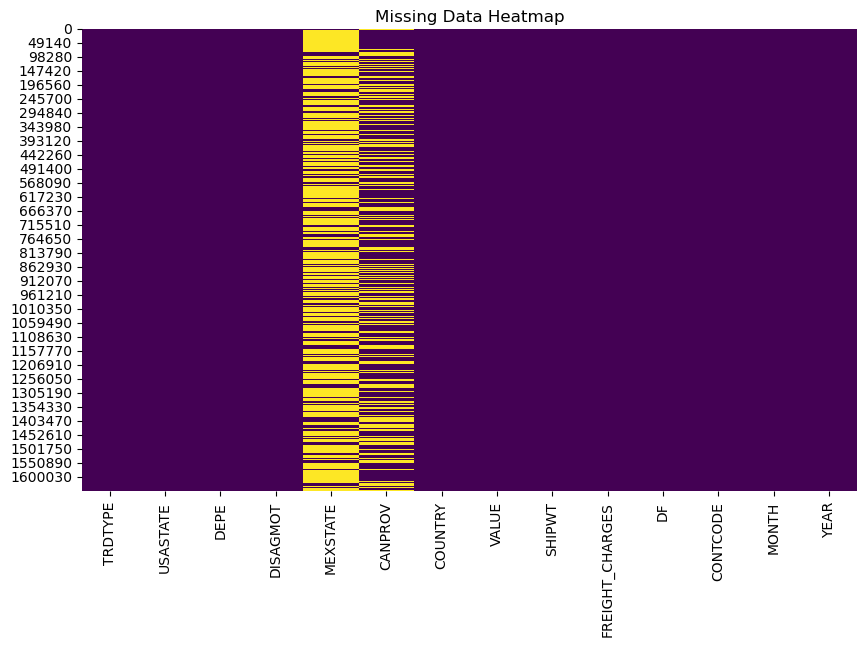

In [55]:
#Heatmap to View Missing Data 
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### Handling Missing Values 

##### Missing Values in both 'MEXSTATE' and 'CANPROV'

In [58]:
#percentage of missing values per 'MEXSTATE' column
combined_dot1['MEXSTATE'].isnull().sum()/len(combined_dot1)*100

70.81729218659716

In [59]:
#percentage of missing values per 'CANPROV' column
combined_dot1['CANPROV'].isnull().sum()/len(combined_dot1)*100

36.667980175270145

In [60]:
# Rows where both MEXSTATE and CANPROV are missing
both_missing = combined_dot1[pd.isnull(combined_dot1['MEXSTATE']) & pd.isnull(combined_dot1['CANPROV'])]

# Count the number of such rows
missing_count = both_missing.shape[0]

# Display the rows where both MEXSTATE and CANPROV are missing
print("Rows where both MEXSTATE and CANPROV are missing:")
print(both_missing)

# Display the count of rows where both MEXSTATE and CANPROV are missing
print(f"\nTotal number of rows where both MEXSTATE and CANPROV are missing: {missing_count}")

Rows where both MEXSTATE and CANPROV are missing:
        TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE CANPROV COUNTRY   VALUE  \
1035     Export       CA  2304    Truck      NaN     NaN  Mexico  101722   
1252     Export       CA  2506    Truck      NaN     NaN  Mexico   26649   
1298     Export       CA  2507    Truck      NaN     NaN  Mexico    7000   
1344     Export       CA  2604    Truck      NaN     NaN  Mexico   39312   
2592     Export       FL  2304    Truck      NaN     NaN  Mexico  131553   
...         ...      ...   ...      ...      ...     ...     ...     ...   
1649097  Import       WY  2507    Truck      NaN     NaN  Mexico   71848   
1649109  Import       WY  30XX    Truck      NaN     NaN  Mexico    7004   
1649117  Import       WY  3307      Air      NaN     NaN  Mexico    2050   
1649129  Import       WY  33XX    Truck      NaN     NaN  Mexico   23409   
1649160  Import       WY  41XX      Air      NaN     NaN  Mexico   11931   

         SHIPWT  FREIGHT_CHARGES     

In [61]:
#calculating the percentage of values that have missing data for both 'MEXSTATE' and 'CANPROV'
missing_count_percentage = missing_count / len(combined_dot1)*100
missing_count_percentage 

7.485272361867304

In [62]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1148381
CANPROV             594612
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

In [63]:
#percentage of missing values per 'DF' column
combined_dot1['DF'].isnull().sum()/len(combined_dot1)*100

0.0

In [64]:
#percentage of missing values per 'MONTH' column
combined_dot1['MONTH'].isnull().sum()/len(combined_dot1)*100

0.0

In [65]:
#dropping missing values in the month column as the two files that is; december 2021 and december 2022 folders contained excel sheets which had no months coplumn. that is; dot1_2021 and dot1_2022. these files are not categorized based on month
combined_dot1 = combined_dot1.dropna(subset=['MONTH'])

In [66]:
#percentage of missing values after handling missing values in month column -
# Rows where both MEXSTATE and CANPROV are missing
both_missing = combined_dot1[pd.isnull(combined_dot1['MEXSTATE']) & pd.isnull(combined_dot1['CANPROV'])]

# Count the number of such rows
missing_count = both_missing.shape[0]

# Display the rows where both MEXSTATE and CANPROV are missing
print("Rows where both MEXSTATE and CANPROV are missing:")
print(both_missing)

# Display the count of rows where both MEXSTATE and CANPROV are missing
print(f"\nTotal number of rows where both MEXSTATE and CANPROV are missing: {missing_count}")

Rows where both MEXSTATE and CANPROV are missing:
        TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE CANPROV COUNTRY   VALUE  \
1035     Export       CA  2304    Truck      NaN     NaN  Mexico  101722   
1252     Export       CA  2506    Truck      NaN     NaN  Mexico   26649   
1298     Export       CA  2507    Truck      NaN     NaN  Mexico    7000   
1344     Export       CA  2604    Truck      NaN     NaN  Mexico   39312   
2592     Export       FL  2304    Truck      NaN     NaN  Mexico  131553   
...         ...      ...   ...      ...      ...     ...     ...     ...   
1649097  Import       WY  2507    Truck      NaN     NaN  Mexico   71848   
1649109  Import       WY  30XX    Truck      NaN     NaN  Mexico    7004   
1649117  Import       WY  3307      Air      NaN     NaN  Mexico    2050   
1649129  Import       WY  33XX    Truck      NaN     NaN  Mexico   23409   
1649160  Import       WY  41XX      Air      NaN     NaN  Mexico   11931   

         SHIPWT  FREIGHT_CHARGES     

In [67]:
#calculating the percentage of values that have missing data for both 'MEXSTATE' and 'CANPROV'
missing_count_percentage = missing_count / len(combined_dot1)*100
missing_count_percentage 

7.485272361867304

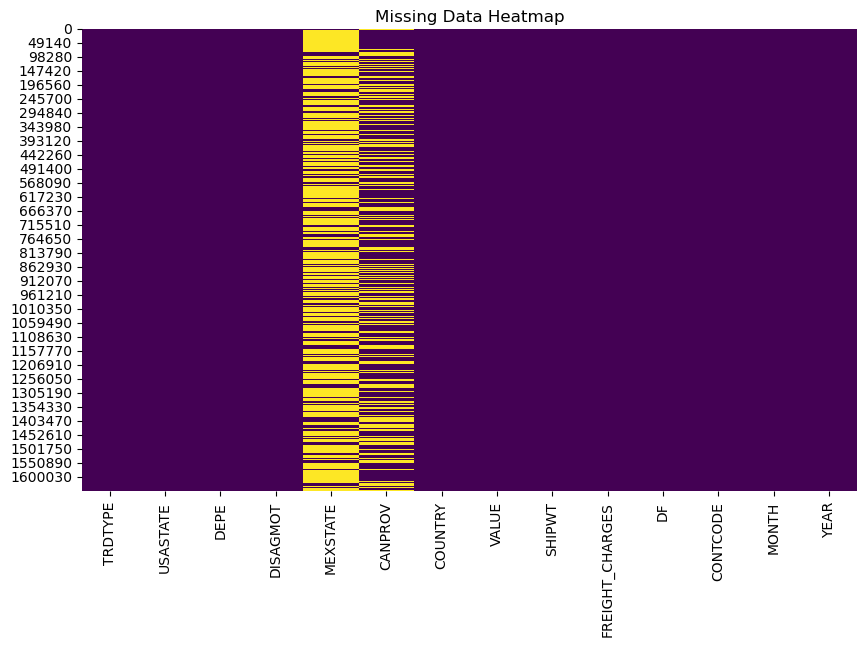

In [68]:
#Heatmap after handling missing values in month column
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

##### Missing Values in 'DF' 

In [70]:
#percentage of missing values per 'DF' column
combined_dot1['DF'].isnull().sum()/len(combined_dot1)*100

0.0

In [71]:
# Handling missing values in the 'DF' column
combined_dot1.groupby(['USASTATE'])['DF'].describe()

,count,unique,top,freq
USASTATE,,,,
AK,9752,3,nan,5878
AL,27790,3,Domestic,12407
AR,21271,3,Domestic,10864
AZ,37793,3,Domestic,15042
CA,77861,3,Domestic,33097
CO,30208,3,Domestic,12770
CT,28448,3,nan,11210
DC,3667,3,nan,2481
DE,14625,3,nan,5976


In [72]:
# this was done using the mode of 'DF' grouped by 'USASTATE'
import pandas as pd
from sklearn.impute import SimpleImputer


# checking the missing values in the 'DF' column
missing_values = combined_dot1['DF'].isna().sum()
print(f"Missing values: {missing_values}")


# Imputing missing values based on 'USASTATE' column
combined_dot1['DF'] = combined_dot1.groupby(['USASTATE','TRDTYPE'], group_keys=False)['DF'].apply(lambda x: x.fillna(x.mode()[0]))

# If you still have missing values, you can fallback to imputing the mode of the entire column:
#imputer = SimpleImputer(strategy='most_frequent')
#combined_dot1['DF'] = imputer.fit_transform(combined_dot1[['DF']])

print(combined_dot1.head())

Missing values: 0
  TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE        CANPROV COUNTRY    VALUE  \
0  Export       AK  0115    Truck      NaN  New Brunswick  Canada     4660   
1  Export       AK  0901    Truck      NaN        Ontario  Canada    14360   
2  Export       AK  20XX   Vessel       XX            NaN  Mexico  4293733   
3  Export       AK  20XX      Air      NaN        Alberta  Canada    28283   
4  Export       AK  20XX      Air      NaN        Alberta  Canada    29848   

     SHIPWT  FREIGHT_CHARGES        DF           CONTCODE  MONTH  YEAR  
0         0               67   Foreign      Containerized  April  2020  
1         0              282  Domestic      Containerized  April  2020  
2  24971000                0  Domestic  Non-Containerized  April  2020  
3       443              563  Domestic      Containerized  April  2020  
4        69              538   Foreign      Containerized  April  2020  


In [73]:
combined_dot1.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
1649156,Import,WY,4101,Air,NaN,British Columbia,Canada,8869,63,290,nan,Non-Containerized,September,2024
1649157,Import,WY,4101,Air,NaN,Nova Scotia,Canada,10853,29,72,nan,Non-Containerized,September,2024
1649158,Import,WY,4101,Air,NaN,Ontario,Canada,59348,307,858,nan,Non-Containerized,September,2024
1649159,Import,WY,4101,Air,NaN,Quebec,Canada,12689,53,382,nan,Non-Containerized,September,2024
1649160,Import,WY,41XX,Air,NaN,NaN,Mexico,11931,38,136,nan,Non-Containerized,September,2024


In [74]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1148381
CANPROV             594612
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

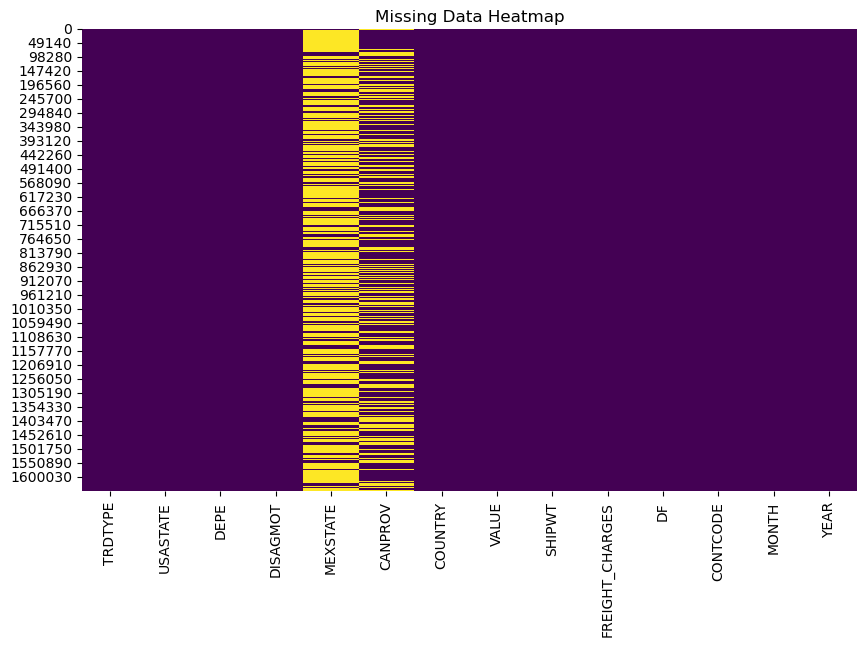

In [75]:
#Heatmap after handling missing values in month column
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [76]:
combined_dot1['TRDTYPE'].value_counts()

TRDTYPE
Export    1012540
Import     609071
Name: count, dtype: int64

In [77]:
# Renaming values in theb 'TRDTYPE' column
combined_dot1["TRDTYPE"] = combined_dot1["TRDTYPE"].replace({1: 'Export',
    2: 'Import'})

In [78]:
combined_dot1['TRDTYPE'].value_counts()

TRDTYPE
Export    1012540
Import     609071
Name: count, dtype: int64

In [79]:
combined_dot1['USASTATE'].value_counts()

USASTATE
TX    95707
CA    77861
IL    61961
FL    51249
OH    50766
NY    50462
PA    50204
GA    48044
MI    47179
WI    44014
NC    42937
NJ    42135
IN    41094
MN    40555
WA    40486
TN    40142
MA    38047
AZ    37793
MO    34229
SC    33000
KY    32067
VA    31742
OR    30387
CO    30208
KS    29076
CT    28448
IA    28379
AL    27790
LA    26726
MD    26020
UT    25868
OK    25281
MS    24549
NV    23541
NE    22040
AR    21271
ME    21191
ID    20387
NH    20197
ND    17899
MT    16247
SD    15169
NM    15091
VT    14744
DE    14625
RI    13786
WV    12854
WY    10463
AK     9752
DU     9321
HI     4960
DC     3667
Name: count, dtype: int64

In [80]:
combined_dot1['DEPE'].value_counts()

DEPE
2304    175472
3802     66016
20XX     65096
0901     57043
3401     54745
         ...  
2481         9
3881         5
0182         3
0152         2
3385         1
Name: count, Length: 246, dtype: int64

In [81]:
combined_dot1['DISAGMOT'].value_counts()

DISAGMOT
Truck                  897579
Air                    317681
Rail                   238576
Other                  104187
Vessel                  51474
Pipeline                 6413
Foreign Trade Zones      4669
Mail                     1032
Name: count, dtype: int64

In [82]:
# renaming values in the 'DISAGMOT' column #FTZ = Foreign Trade Zones
combined_dot1["DISAGMOT"] = combined_dot1["DISAGMOT"].replace({1: 'Vessel',
    3: 'Air',
    4: 'Mail',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'FTZs'
    })

In [83]:
combined_dot1['DISAGMOT'].value_counts()

DISAGMOT
Truck                  897579
Air                    317681
Rail                   238576
Other                  104187
Vessel                  51474
Pipeline                 6413
Foreign Trade Zones      4669
Mail                     1032
Name: count, dtype: int64

In [84]:
combined_dot1['MEXSTATE'].value_counts()

MEXSTATE
XX    55082
MX    41404
NL    33574
CH    30881
DF    26697
JA    26363
BC    24366
SO    21810
TM    21528
CO    21456
QT    19465
OT    18046
GT    17379
SI    12070
SL    11476
PU     9949
DG     9423
AG     9404
CM     7757
VE     7658
HG     7530
MI     6082
MO     5779
TL     4581
ZA     4248
BS     3796
QR     3793
YU     3062
TB     2265
CL     1879
OA     1746
CS     1520
GR     1161
Name: count, dtype: int64

In [85]:
combined_dot1['CANPROV'].value_counts()

CANPROV
Ontario                  275473
Quebec                   183573
British Columbia         163197
Alberta                  147036
Manitoba                  97218
Saskatchewan              58037
New Brunswick             52120
Nova Scotia               27490
Prince Edward Island      11919
Newfoundland               9140
Yukon Territory            1116
Northwest Territories       307
Province Unknown            296
Nunavut                      77
Name: count, dtype: int64

In [86]:
combined_dot1['COUNTRY'].value_counts()

COUNTRY
Canada    1026999
Mexico     594612
Name: count, dtype: int64

In [87]:
# Renaming values in the 'COUNTRY' column
combined_dot1["COUNTRY"] = combined_dot1["COUNTRY"].replace({1220: 'Canada',
    2010: 'Mexico'})

In [88]:
combined_dot1['COUNTRY'].value_counts()

COUNTRY
Canada    1026999
Mexico     594612
Name: count, dtype: int64

In [89]:
combined_dot1['VALUE'].count()

1621611

In [90]:
combined_dot1['SHIPWT'].count()

1621611

In [91]:
combined_dot1['FREIGHT_CHARGES'].count()

1621611

In [92]:
combined_dot1['DF'].value_counts()

DF
Domestic    678438
nan         609071
Foreign     334102
Name: count, dtype: int64

In [93]:
# Renaming values in the 'DF' column
combined_dot1["DF"] = combined_dot1["DF"].replace({1.0: 'Domestic',
    2.0: 'Foreign'})

In [94]:
combined_dot1['DF'].value_counts()

DF
Domestic    678438
nan         609071
Foreign     334102
Name: count, dtype: int64

In [95]:
combined_dot1['CONTCODE'].value_counts()

CONTCODE
Non-Containerized    880214
Containerized        594172
Others               147225
Name: count, dtype: int64

In [96]:
# Renaming values in the 'CONTCODE' column
combined_dot1["CONTCODE"] = combined_dot1["CONTCODE"].replace({'X': 'Containerized',
    '0':'Non_Containerized', '1':'Others'})

In [97]:
combined_dot1['CONTCODE'].value_counts()

CONTCODE
Non-Containerized    880214
Containerized        594172
Others               147225
Name: count, dtype: int64

#### Missing Values in 'MONTH'

###### The Values in the month column were dropped as two as the two files that is: December 2021 and December 2022 folders contained excel sheets which had no months column. that is: dot1_2021 and dot1_2022. these files are not catergorized based on month 

In [100]:
combined_dot1['MONTH'].value_counts()

MONTH
March        142647
August       139989
June         139585
July         139071
September    139010
May          138785
April        137937
February     136713
January      134648
nan          121126
October       85210
November      84257
December      82633
Name: count, dtype: int64

In [101]:
combined_dot1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621611 entries, 0 to 1649160
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   TRDTYPE          1621611 non-null  object
 1   USASTATE         1621611 non-null  object
 2   DEPE             1621611 non-null  object
 3   DISAGMOT         1621611 non-null  object
 4   MEXSTATE         473230 non-null   object
 5   CANPROV          1026999 non-null  object
 6   COUNTRY          1621611 non-null  object
 7   VALUE            1621611 non-null  int64 
 8   SHIPWT           1621611 non-null  int64 
 9   FREIGHT_CHARGES  1621611 non-null  int64 
 10  DF               1621611 non-null  object
 11  CONTCODE         1621611 non-null  object
 12  MONTH            1621611 non-null  object
 13  YEAR             1621611 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 185.6+ MB


#### Data Cleaning and Validation

In [103]:
combined_dot1.isna().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1148381
CANPROV             594612
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

In [104]:
combined_dot1['MONTH'].unique()

array(['April', 'August', 'February', 'January', 'July', 'June', 'March',
       'May', 'September', 'December', 'nan', 'November', 'October'],
      dtype=object)

In [105]:
combined_dot1['DF'].unique()

array(['Foreign', 'Domestic', 'nan'], dtype=object)

In [106]:
combined_dot1['MONTH'].unique()

array(['April', 'August', 'February', 'January', 'July', 'June', 'March',
       'May', 'September', 'December', 'nan', 'November', 'October'],
      dtype=object)

In [107]:
#describing the categorical variables
combined_dot1.describe(include='object')

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,DF,CONTCODE,MONTH
count,1621611,1621611,1621611,1621611,473230,1026999,1621611,1621611,1621611,1621611
unique,2,52,246,8,33,14,2,3,3,13
top,Export,TX,2304,Truck,XX,Ontario,Canada,Domestic,Non-Containerized,March
freq,1012540,95707,175472,897579,55082,275473,1026999,678438,880214,142647


In [108]:
combined_dot1['MEXSTATE'].unique()

array([nan, 'XX', 'CO', 'NL', 'CH', 'CM', 'GT', 'JA', 'MX', 'OT', 'QT',
       'SL', 'BC', 'BS', 'DF', 'TM', 'ZA', 'DG', 'HG', 'SO', 'AG', 'MI',
       'MO', 'PU', 'TL', 'VE', 'SI', 'YU', 'TB', 'CS', 'CL', 'OA', 'QR',
       'GR'], dtype=object)

In [109]:
combined_dot1['MEXSTATE'].value_counts()

MEXSTATE
XX    55082
MX    41404
NL    33574
CH    30881
DF    26697
JA    26363
BC    24366
SO    21810
TM    21528
CO    21456
QT    19465
OT    18046
GT    17379
SI    12070
SL    11476
PU     9949
DG     9423
AG     9404
CM     7757
VE     7658
HG     7530
MI     6082
MO     5779
TL     4581
ZA     4248
BS     3796
QR     3793
YU     3062
TB     2265
CL     1879
OA     1746
CS     1520
GR     1161
Name: count, dtype: int64

In [110]:
#describing the categorical variables
combined_dot1.describe()

,VALUE,SHIPWT,FREIGHT_CHARGES,YEAR
count,1.621611e+06,1.621611e+06,1.621611e+06,1.621611e+06
mean,5.760529e+06,2.344307e+06,7.560707e+04,2.022008e+03
std,1.114547e+08,1.125783e+08,2.755028e+06,1.290613e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03
25%,2.008800e+04,0.000000e+00,0.000000e+00,2.021000e+03
50%,1.060020e+05,3.000000e+00,3.950000e+02,2.022000e+03
75%,7.009690e+05,9.789500e+03,3.958000e+03,2.023000e+03
max,4.801019e+10,8.395042e+10,2.009334e+09,2.024000e+03


In [111]:
combined_dot1['USASTATE'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'DU', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [112]:
combined_dot1['DF'].unique()

array(['Foreign', 'Domestic', 'nan'], dtype=object)

In [113]:
(combined_dot1['DF'] == 'nan').sum()/len(combined_dot1)*100

37.559624348872816

In [114]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Fill missing values in 'DF' column based on the mode within each 'COUNTRY' group
def impute_mode(series):
    mode_val = series.mode()
    return series.fillna(mode_val[0]) if not mode_val.empty else series

combined_dot1['DF'] = combined_dot1.groupby('COUNTRY')['DF'].transform(impute_mode)

# If there are still missing values, impute with the most frequent value in the entire column
imputer = SimpleImputer(strategy='most_frequent')
combined_dot1['DF'] = imputer.fit_transform(combined_dot1[['DF']]).ravel()  # ✅ Fixed

print(combined_dot1.head())


  TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE        CANPROV COUNTRY    VALUE  \
0  Export       AK  0115    Truck      NaN  New Brunswick  Canada     4660   
1  Export       AK  0901    Truck      NaN        Ontario  Canada    14360   
2  Export       AK  20XX   Vessel       XX            NaN  Mexico  4293733   
3  Export       AK  20XX      Air      NaN        Alberta  Canada    28283   
4  Export       AK  20XX      Air      NaN        Alberta  Canada    29848   

     SHIPWT  FREIGHT_CHARGES        DF           CONTCODE  MONTH  YEAR  
0         0               67   Foreign      Containerized  April  2020  
1         0              282  Domestic      Containerized  April  2020  
2  24971000                0  Domestic  Non-Containerized  April  2020  
3       443              563  Domestic      Containerized  April  2020  
4        69              538   Foreign      Containerized  April  2020  


In [116]:
# Group by 'COUNTRY' and fill missing values in 'DF' with the mode of each group
combined_dot1['DF'] = combined_dot1.groupby('COUNTRY')['DF'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

# Check the result
print(combined_dot1.head())

  TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE        CANPROV COUNTRY    VALUE  \
0  Export       AK  0115    Truck      NaN  New Brunswick  Canada     4660   
1  Export       AK  0901    Truck      NaN        Ontario  Canada    14360   
2  Export       AK  20XX   Vessel       XX            NaN  Mexico  4293733   
3  Export       AK  20XX      Air      NaN        Alberta  Canada    28283   
4  Export       AK  20XX      Air      NaN        Alberta  Canada    29848   

     SHIPWT  FREIGHT_CHARGES        DF           CONTCODE  MONTH  YEAR  
0         0               67   Foreign      Containerized  April  2020  
1         0              282  Domestic      Containerized  April  2020  
2  24971000                0  Domestic  Non-Containerized  April  2020  
3       443              563  Domestic      Containerized  April  2020  
4        69              538   Foreign      Containerized  April  2020  


In [118]:
combined_dot1['DF'].unique()

array(['Foreign', 'Domestic', 'nan'], dtype=object)

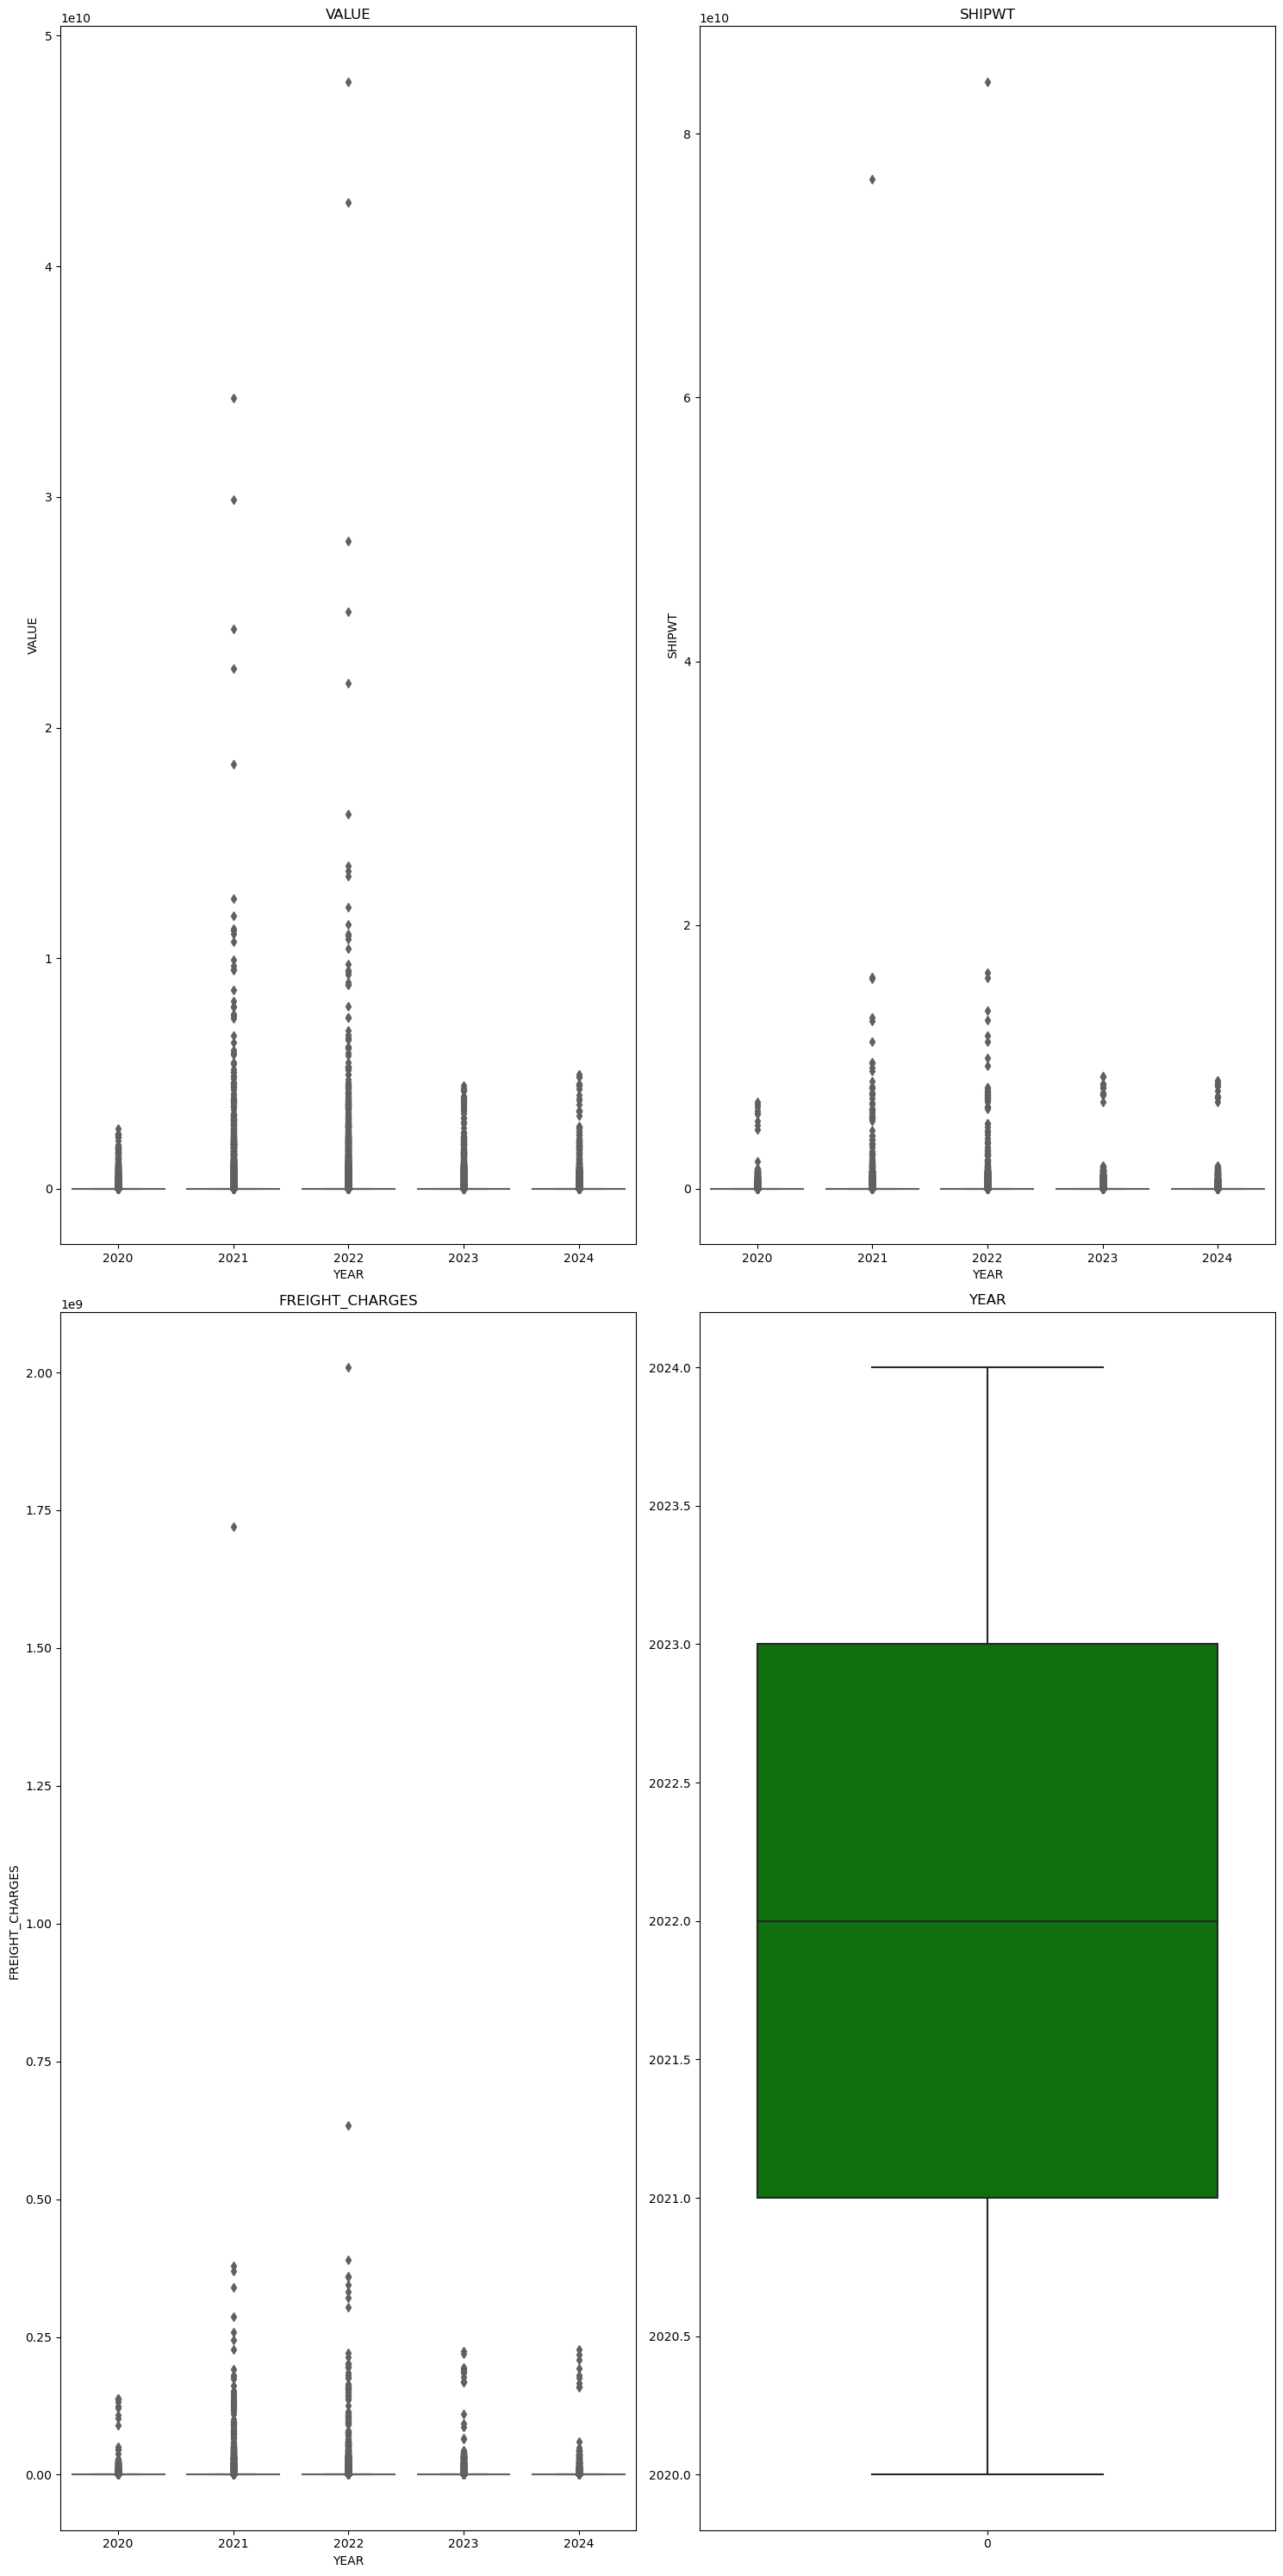

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data by years 2020 to 2024
years = [2020, 2021, 2022, 2023, 2024]

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))
plt.title('Outliers in Numerical Data by Year')

# Plot VALUE by year
sns.boxplot(x='YEAR', y='VALUE', data=combined_dot1[combined_dot1['YEAR'].isin(years)], palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('VALUE')

# Plot SHIPWT by year
sns.boxplot(x='YEAR', y='SHIPWT', data=combined_dot1[combined_dot1['YEAR'].isin(years)], palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('SHIPWT')

# Plot FREIGHT_CHARGES by year
sns.boxplot(x='YEAR', y='FREIGHT_CHARGES', data=combined_dot1[combined_dot1['YEAR'].isin(years)], palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('FREIGHT_CHARGES')

sns.boxplot(combined_dot1['YEAR'],color='green',ax=axes[1,1])
axes[1,1].set_title('YEAR')


# Improve layout
plt.tight_layout()
plt.show()

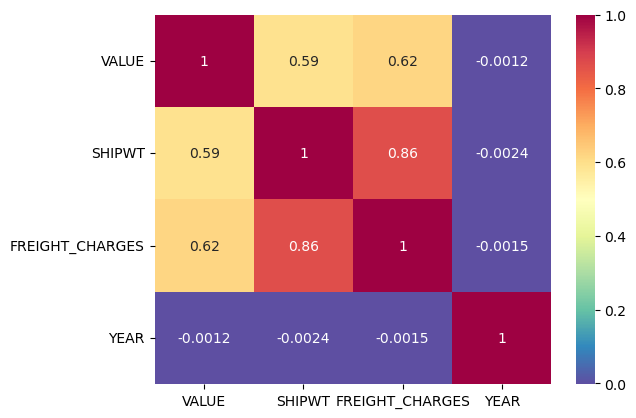

In [122]:
# Create correlation matrix
correlation = combined_dot1.select_dtypes("number").corr()
correlation

# Plot heatmap of `correlation`
sns.heatmap(correlation,annot = correlation,cmap = 'Spectral_r');

#### Univariate Analysis

###### Numerical

###### Categorical

#### Bivariate Analysis
